<a href="https://colab.research.google.com/github/Shuv13/Image-Classifier/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

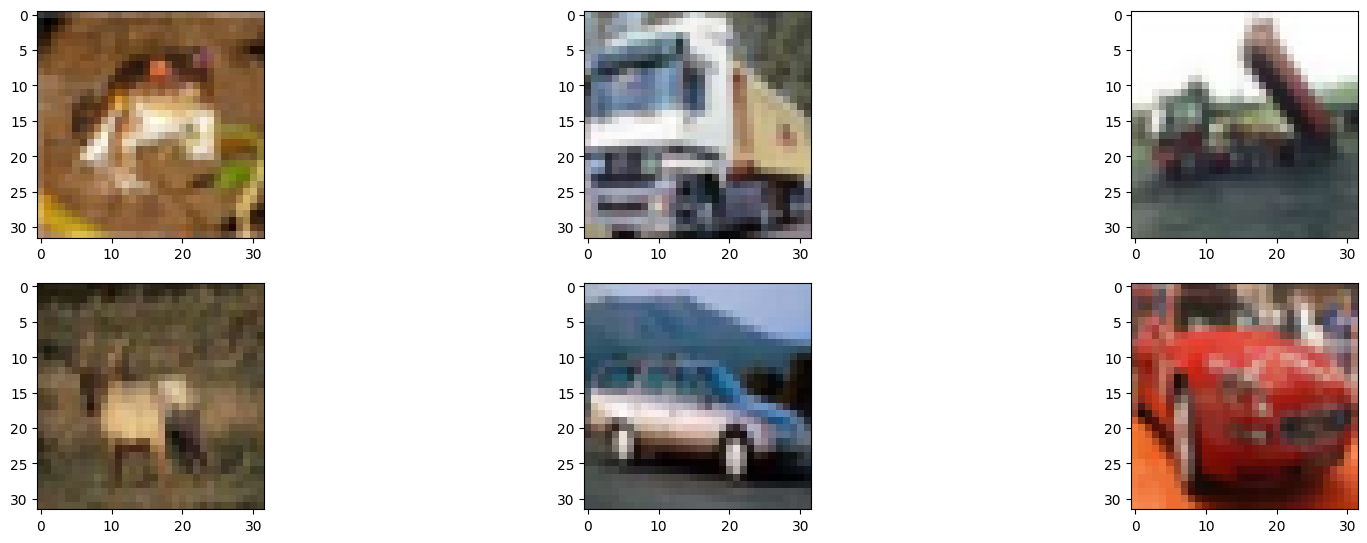

In [22]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
   plt.subplot(330+1+i)
   plt.imshow(train_X[i])
plt.show()

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D # Corrected import path for Conv2D and MaxPooling2D
#from keras.utils import np_utils # Commented out the old import
from tensorflow.keras.utils import to_categorical # Added the new import for to_categorical

In [24]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')

train_X=train_X/255.0
test_X=test_X/255.0

In [25]:
train_Y=to_categorical(train_Y)
test_Y=to_categorical(test_Y)

num_classes=test_Y.shape[1]

In [26]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=MaxNorm(3))) # Changed maxnorm(3) to MaxNorm(3)
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=MaxNorm(3))) # Changed maxnorm(3) to MaxNorm(3)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=MaxNorm(3))) # Changed maxnorm(3) to MaxNorm(3)
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
sgd=SGD(learning_rate=0.01,momentum=0.9,nesterov=False)

model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=25,batch_size=32)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 213s 135ms/step - accuracy: 0.2911 - loss: 1.9476 - val_accuracy: 0.4366 - val_loss: 1.5399
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 268s 139ms/step - accuracy: 0.4700 - loss: 1.4712 - val_accuracy: 0.5339 - val_loss: 1.3117
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 139ms/step - accuracy: 0.5406 - loss: 1.2814 - val_accuracy: 0.5603 - val_loss: 1.2365
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 258s 136ms/step - accuracy: 0.6000 - loss: 1.1247 - val_accuracy: 0.6118 - val_loss: 1.1030
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 207s 133ms/step - accuracy: 0.6444 - loss: 0.9997 - val_accuracy: 0.6200 - val_loss: 1.0787
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 267s 136ms/step - accuracy: 0.6841 - loss: 0.8964 - val_accuracy: 0.6560 - val_loss: 0.9945
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 137ms/step - accuracy: 0.7260 - loss: 0.7811 - val_accuracy: 0.6543 - val_loss: 1.0038
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 255s 132ms/step - ac

In [34]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6803 - loss: 1.3029
68.40999722480774


In [33]:
model.save("model1_cifar_10epoch.h5")

In [32]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("/content/dog.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)

im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=np.argmax(model.predict([im]), axis=1)[0] # Replaced predict_classes with predict and np.argmax
print(pred,results[pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
0 aeroplane


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_73
Received: inputs=('Tensor(shape=(1, 32, 32, 3))',)
  warnings.warn(msg)
